In [1]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
def get_history_file(model_name):
    return glob.glob(f'../outs/{model_name}/*log*')

get_history_file("20230806_GATv2")

['../outs/20230806_GATv2/log.txt']

In [5]:
history_files = get_history_file("20230806_past")

rn_val_loss = []
rn_epochs = []
for history_file in history_files:
    with open(history_file, "r") as f:
        for line in f.readlines():
            if not "Val Loss" in line:
                continue
            rn_val_loss += [float(line.split()[-1])]
            rn_epochs += [int(line.split()[1][:-1])]

best_epoch = rn_epochs[np.argmin(rn_val_loss)]

len(rn_epochs), len(rn_val_loss), best_epoch

(101, 101, 62)

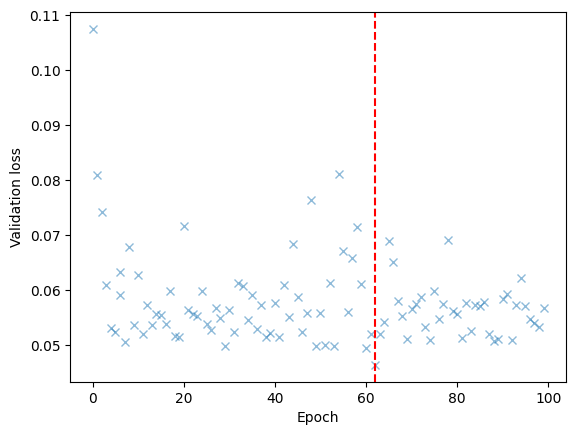

In [6]:
plt.figure()
plt.plot(rn_epochs, rn_val_loss, marker="x", ls="none", alpha=0.5)
plt.axvline(x=best_epoch, color="red", ls="--", label="Best epoch")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()
plt.close()